# Lab Session #2
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Jorne Laton, Lloyd Plumart, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs: </font> Cesar Zapata - 02213600
<br>
<font color=blue>Academic Year: </font> 2023

### General Introduction
In all the practical sessions of this course we will use python 3 and jupyter notebooks. Please install anaconda on your computer and after installation you can open jupyter notebook by typing "jupyter notebook" in the command line. Your browser will open a search directory, which you can use to browse to and open the exercise. Alternatively, you can use jupyter-lab. 

Deadline: 2 weeks after lecture

The lab sessions consist of a jupyter notebook in which the different steps are described and explained, together with the tasks that students are asked to complete.

This practical is based upon the freely available python exercise: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/adex-model.html

### Context and Goals
This second lab session is focused on the Adaptive Exponential Integrate-and-Fire model. The students are asked to implement the equations as seen in the lecture (and repeated here) and describe what they see in different simulations. 

Whereas most of coding can be done without the BRIAN package, it can be a useful tool to check your own results. 

# Questions
## 1 AdEx Integrate-and-Fire model

In this first part, we will code and develop the Adaptive exponential integrate-and-fire model, without the use of the BRIAN library. To complete this task, start from the theoretical chapter https://neuronaldynamics.epfl.ch/online/Ch6.S1.html and the following equations:

\begin{align*}
    \tau_m \frac{\textrm{d}u}{\textrm{d}t} &= -(u-u_{\textrm{rest}}) + \Delta_T \exp\left(\frac{u-\theta_{\textrm{rh}}}{\Delta_T}\right) -R w + RI(t) \\
    \tau_w \frac{\textrm{d}w}{\textrm{d}t} &= a(u-u_{\textrm{rest}}) - w + b\tau_w \sum_{t^f} \delta(t-t^f)
\end{align*}

The following constants can be used for the model parameters. Note that the BRIAN package uses units. Whereas this is not required for your own coding, make sure that the units match!

* [Import these modules](#P1_import)

In [1]:
# For your own code, use the following variable names. They do not need a unit to be attached as for the BRIAN package.

# tau_m
# R_m
# u_rest
# u_reset
# v_rheobase
# delta_T
# a
# tau_w
# b

### Q1 Generate input current <a id="Q1"/>
Q1a The first step is to generate the input current I(t). For this we create a step function of length 350 ms. The input current is 0 µA at t = 0 and steps to 1 µA at t = 20ms. The input current is reset to 0 µA at t = 200ms. 
Create and plot I_input in function of t and make sure that the time step is 0.01 ms. This timestep corresponds to the integration step when we will solve the differential equations and can remain constant for the purpose of this practical.

Q1b Create a function that outputs u(t), w(t), DeltaU(t) and DeltaW(t) in function of the initial values of u and w (u_0,w_0) and the input current I_input(t). Please also print the time point whenever an action potential is being fired.

Q1c Test this function with the input current that you have defined previously but with an amplitude of 65 pA and create five plots below each other:
- I(t)
- u(t)
- w(t)
- DeltaU(t)
- DeltaW(t)

The initial value of u is u_rest (-70 mV), the inital value of w can be set to zero.

Q1d Describe the evolution between subsequent action potentials. Plot the evolution of these intervals. What do you notice?

* [Fill in answer here](#A1)

## 2 BRIAN Library - I&F models

Here we will implement the non-adaptive and adaptive exponential integrate-and-fire model through the BRIAN package. 

First things first, the non-adaptive I&F model: 
- Again we need to create an input current. Within the BRIAN package the same input profile as before can be easily calculated with the `input_factory.get_step_current()` function
- Next, we need to simulate the model. This can be done through the `exp_IF()` function. Which are the default values of this model? 
- Finally, we plot our output with the `plot_tools.plot_voltage_and_current_traces()` tool. 

### Q2.1 Exponential Integrate and Fire <a id="Q2.1"/>

Apply the suggested functions to simulate the behaviour of a firing neuron when the exponential integrate and fire model is used.
1. Apply a step input current of amplitude 0.9 nA that starts at t = 20 ms and ends at t = 150 ms
2. Simulate what happens for 200 ms

How many spikes do you get?

* [Fill in answer here](#A2.1)

### Q2.2  Adaptive Exponential I&F - BRIAN <a id="Q2.2"/>
What happens when you substitute the non-adaptive by the adaptive exponential model? You can use the `simulate_AdEx_neuron` function. 

1. Apply an input current of amplitude 90 pA that starts at t = 50 ms and ends at t = 150 ms.
2. Simulate what happens for 350 ms using `simulate_AdEx_neuron`

How many spikes are you getting now?

* [Fill in answer here](#A2.2)

### Q2.3 Characteristics <a id="Q2.3"/>
Which are the characteristics of the AdEx model? How many spikes do you observe? Describe the firing pattern.

* [Fill in answer here](#A2.3)

## 3 Firing Pattern

### Q3 Simulate all patterns <a id="Q3"/>

By changing the parameters in the function `AdEx.simulate_AdEx_neuron()`, you can simulate different firing patterns. Create tonic, adapting, initial burst, bursting, irregular, transient and delayed firing patterns. Table 6.1 provides a starting point.

Simulate your model for 350 ms and use a step current of 67 pA starting at t = 50 to t = 250.

* [Fill in answer here](#A3)

## 4 Phase plane and Nullclines
In this section, you will acquire some intuition on shape of nullclines by plotting and answering the following questions.

* [Import these modules](#P4_import)

### Q4.1 Run AdEx <a id="Q4.1"/>
Plot the u and w nullclines of the AdEx model 
1. How do the nullclines change with respect to a?
2. How do the nullclines change if a constant current I(t) = c is applied?
3. What is the interpretation of parameter b?
4. How do flow arrows change as tau_w gets bigger?

For this plot, you won't need the BRIAN library, but you can use functions that are available through numpy. You will need to create a grid of $u,w$ values through np.meshgrid. Next, for each point of this grid, you will have to evaluate the time-derivative (Formulas 6.3 and 6.4). Finally, you will have to calculate the null-clines and plot everything together on a single plot. For the plotting of the arrows, you can have a look at the np.quiver function.

* [Fill in answer here](#A4.1)

### Q4.2 Predict firing pattern <a id="Q4.2">

Can you predict what would be the firing pattern if the value 'a' is small (in the order of 0.01 nS) ? To do so, consider the following 2 conditions:

A large jump b and a large time scale tau_w.
A small jump b and a small time scale tau_w.
Try to simulate the above conditions, to see if your predictions were correct.
    
* [Fill in answer here](#A4.2)

# Answers

## 1 AdEx Integrate-and-Fire model

### Import <a id="P1_import"/>

In [2]:
# Here add all the libraries and modules that are needed throughout the notebook
import math
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
# Make your graphs color blind friendly
plt.style.use('tableau-colorblind10')

### A1 Generate input current <a id="A1"/>
* [Go back to Q1](#Q1)

In [3]:
# Enter your code below

#######################
##   Q1a solution   ##
#######################

t = np.arange(0, 350, 0.01) # [ms]
I_step = [0 if i < 2000 or i > 20000 else 1 for i in range(35000)] # in uA

In [4]:
# Enter your code below

# Hint: be careful with the units, R_m in GOhm!

#######################
##   Q1b solution   ##
#######################


# global constants
u_rest = -70 #mV
w_0 = 0
R = 0.5 #Mohm
a = 0.0 #nS
b = 5
v_rheobase = -50
u_reset = -55 #mV
delta_T = 2 #mV
Tau_m = 20 #ms
Tau_w = 100 #ms
dt = 0.01


def adex(u_0, w_0, I_input):
 

    u = np.zeros(len(I_input))
    w = np.zeros(len(I_input))
    delta_us = np.zeros(len(I_input))
    delta_ws = np.zeros(len(I_input))
    
    u[0] = u_0
    w[0] = w_0
    delta_us[0] = 0
    delta_ws[0] = 0
    spike_times = []
    
    for i in range(1, len(I_input)):
        
        delta_us[i] = dt / Tau_m * (-u[i-1] + u_rest + delta_T * np.exp((u[i-1] - v_rheobase) / delta_T) - R * w[i-1] + R * I_input[i])  
        u[i] = u[i-1] + delta_us[i]
        
        if u[i] > v_rheobase:
            u[i] = u_reset
            spike_times.append(dt*i)
            delta_ws[i] = dt / Tau_w * (a * (u[i-1] - u_rest) - w[i-1] + b * Tau_w)         
            w[i] = w[i-1] + delta_ws[i]
        
        else:
            delta_ws[i] = dt / Tau_w * (a * (u[i-1] - u_rest) - w[i-1])           
            w[i] = w[i-1] + delta_ws[i]
            
        
    print(f'Spike times (in miliseconds):\n{spike_times}')
        
    return u, w, delta_us, delta_ws, spike_times

Spike times (in miliseconds):
[38.730000000000004, 45.12, 51.52, 57.93, 64.35, 70.78, 77.21000000000001, 83.65, 90.10000000000001, 96.55, 103.01, 109.47, 115.94, 122.41, 128.89000000000001, 135.37, 141.86, 148.35, 154.84, 161.34, 167.84, 174.34]


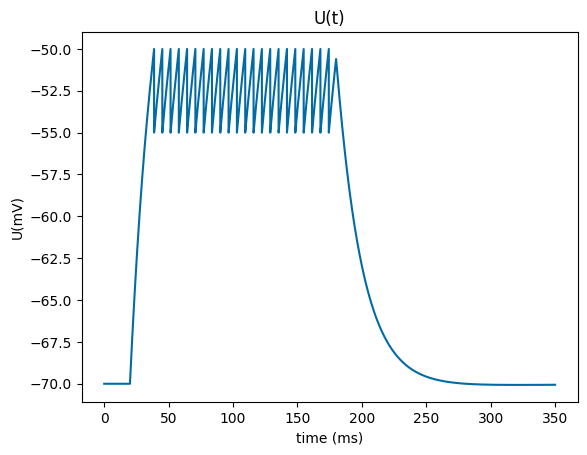

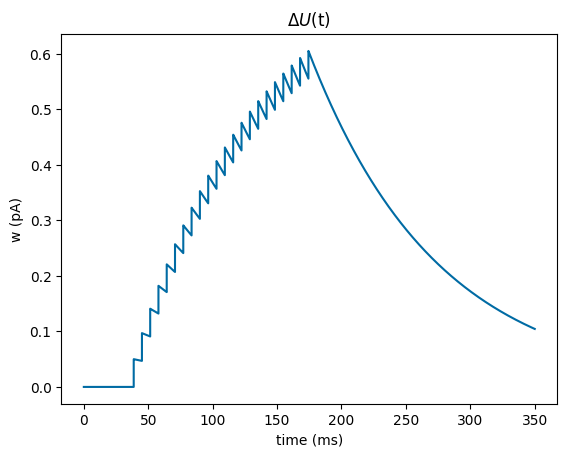

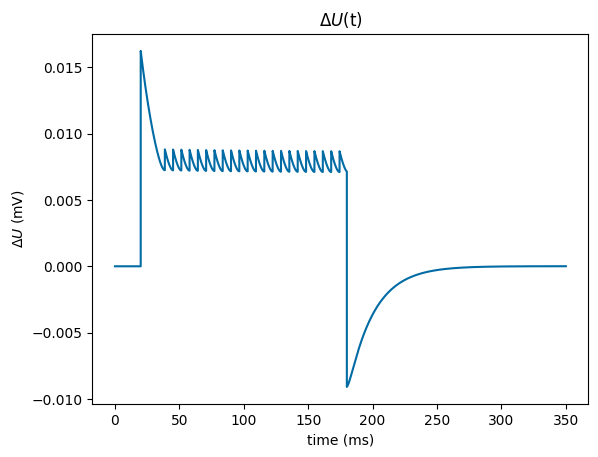

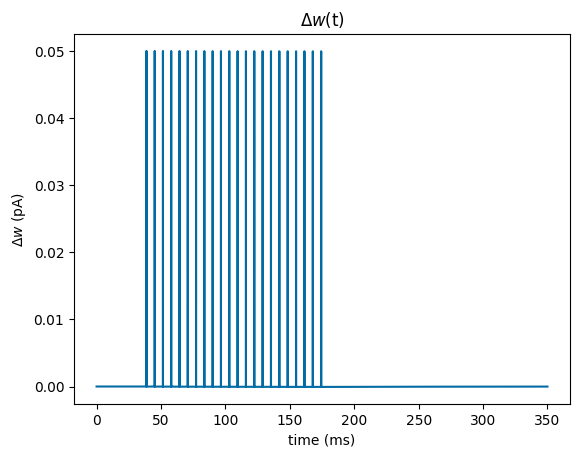

In [5]:
# Enter your code below

#############################
##   Q1c solution plots   ##
#############################


I_step = np.zeros(35000)
for i in range(2000, 18000):
    I_step[i] = 65

t = np.linspace(0,350, 35000)
u, w, du, dw, spike_times = adex(-70, 0.0, I_step)


plt.plot(t, u)
plt.xlabel("time (ms)")
plt.ylabel("U(mV)")
plt.title("U(t)")
plt.show()

plt.plot(t, w)
plt.xlabel("time (ms)")
plt.ylabel("w (pA)")
plt.title("$\\Delta U$(t)")
plt.show()

plt.plot(t, du)
plt.xlabel("time (ms)")
plt.ylabel("$\\Delta U$ (mV)")
plt.title("$\\Delta U$(t)")
plt.show()

plt.plot(t, dw)
plt.xlabel("time (ms)")
plt.ylabel("$\\Delta w$ (pA)")
plt.title("$\\Delta w$(t)")
plt.show()





[13.47 13.49 13.5  13.52 13.53 13.54 13.54 13.55 13.56 14.56]


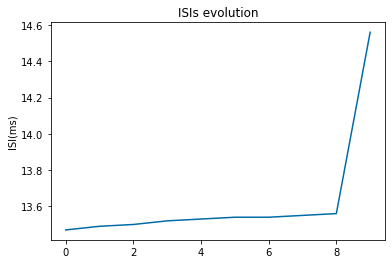

In [25]:
# Enter your answer below

###########################
##   Q1d solution ISI   ##
###########################

ISI = np.diff(spike_times[:])
print(ISI)

#plt.scatter(time_spk, spike_times)
plt.plot(ISI)
plt.title("ISIs evolution")
plt.ylabel("ISI(ms)")
plt.show()

<div class="alert alert-success">
<span style="color:black">

**A1 conclusion:** 

\begin{tcolorbox}[colback=green!5]
    
The observed interspike intervals are getting bigger over time, which reflects the adaptative behavior of the neuron from our model to the current that is being injected.
    
\end{tcolorbox}
    
</span>

## 2 BRIAN Library - I&F models

### Import

In [7]:
%matplotlib inline
import brian2 as b2
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory
from neurodynex3.adex_model import AdEx

### A2.1 Exponential Integrate and Fire <a id="A2.1"/>
* [Go back to Q2.1](#Q2.1)

Number of spikes: 11


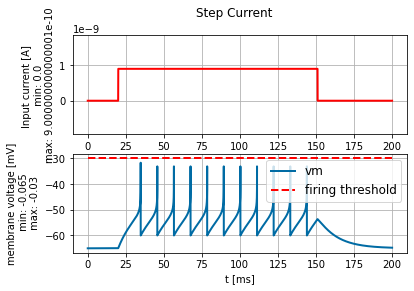

In [8]:
######################
##   Q2.1 solution  ##
######################


Input_I = input_factory.get_step_current(t_start=20, t_end=150, unit_time=b2.ms, amplitude=0.9 * b2.namp)
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=Input_I, simulation_time=200 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, Input_I, title="Step Current", firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print(f"Number of spikes: {spike_monitor.count[0]}")



<div class="alert alert-success">
<span style="color:black">

**A2.1 conclusion:** 
    
\begin{tcolorbox}[colback=green!5]
    
    
The exponential Integrate and Fire model fires regularly in time and with similar uniform amplitudes in every spike. We observe 11 spikes in this simulation with the chosen parameters.
    
\end{tcolorbox}
    
</span>

### A2.2 Adaptive Exponential I&F - BRIAN <a id="A2.2"/>
* [Go back to Q2.2](#Q2.2)

Number of spikes: 13


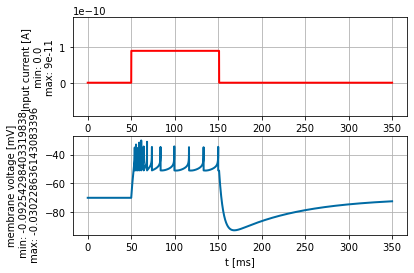

In [9]:
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

######################
##   Q2.2 solution  ##
######################

I_AdEx = input_factory.get_step_current(t_start=50, t_end=150, unit_time=b2.ms, amplitude=90 * b2.pamp)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I_AdEx, simulation_time=350 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, I_AdEx)
print(f"Number of spikes: {spike_monitor.count[0]}")

### A2.3 Characteristics <a id="A2.3"/>
* [Go back to Q2.3](#Q2.3)

In [10]:
######################
##   Q2.3 solution  ##
######################

# answer in green box below


<div class="alert alert-success">
<span style="color:black">

**A2.2 and A2.3 answer:** 
    
\begin{tcolorbox}[colback=green!5]
    
    
The AdEx model presents a very recognisable pattern, with a burst of spikes at the begining of the firing taht leads to a more spaced firing. The spikes spread longer as the time goes on and the neuron adapts to the input current, and when the stimulus finishes the neuron enters a hyper-polarization period that slowly stabilizes around the value of the resting potential.
<br>
This model presents more spikes (13 in total) than the Exponential Integrate and Fire model.

    
\end{tcolorbox}
    
</span>

## 3 Firing Pattern

### A3 Simulate all patterns <a id="A3"/>
* [Go back to Q3](#Q3)

Number of spikes: 7


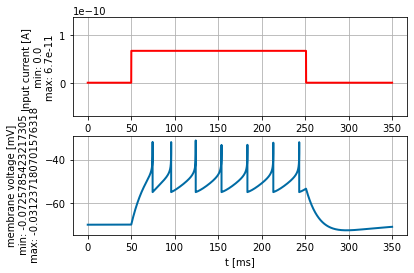

In [11]:
####################
##   Q3 solution  ##
####################

#Tonic

I_AdEx_Tonic = input_factory.get_step_current(t_start=50, t_end=250, unit_time=b2.ms, amplitude=67 * b2.pamp)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I_AdEx_Tonic, simulation_time=350 * b2.ms, a =0. * b2.nS, b=20 * b2.pamp, tau_m=20 * b2.ms, tau_w=30 * b2.ms, v_reset=-55 * b2.mV)

plot_tools.plot_voltage_and_current_traces(state_monitor, I_AdEx_Tonic)
print(f"Number of spikes: {spike_monitor.count[0]}")



Number of spikes: 6


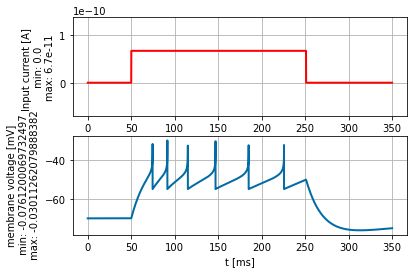

In [12]:
#Adapting

I_AdEx_Adapting = input_factory.get_step_current(t_start=50, t_end=250, unit_time=b2.ms, amplitude=67 * b2.pamp)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I_AdEx_Adapting, simulation_time=350 * b2.ms, a =0. * b2.nS, b=10 * b2.pamp, tau_m=20 * b2.ms, tau_w=100 * b2.ms, v_reset=-55 * b2.mV)

plot_tools.plot_voltage_and_current_traces(state_monitor, I_AdEx_Adapting)
print(f"Number of spikes: {spike_monitor.count[0]}")

Number of spikes: 10


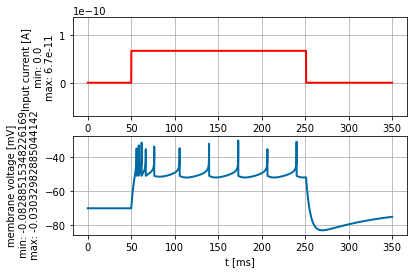

In [13]:
#Initial burst

I_AdEx = input_factory.get_step_current(t_start=50, t_end=250, unit_time=b2.ms, amplitude=67 * b2.pamp)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I_AdEx, simulation_time=350 * b2.ms, a =0.5 * b2.nS, b=7 * b2.pamp, tau_m=5 * b2.ms, tau_w=100 * b2.ms, v_reset=-51 * b2.mV)

plot_tools.plot_voltage_and_current_traces(state_monitor, I_AdEx)
print(f"Number of spikes: {spike_monitor.count[0]}")

Number of spikes: 20


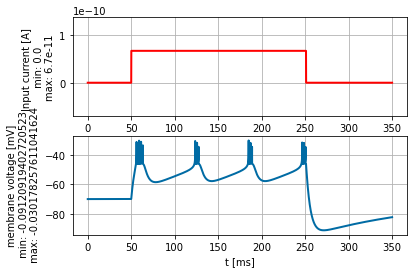

In [14]:
#Bursting

I_AdEx = input_factory.get_step_current(t_start=50, t_end=250, unit_time=b2.ms, amplitude=67 * b2.pamp)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I_AdEx, simulation_time=350 * b2.ms, a =-0.5 * b2.nS, b=7 * b2.pamp, tau_m=5 * b2.ms, tau_w=100 * b2.ms, v_reset=-46 * b2.mV)

plot_tools.plot_voltage_and_current_traces(state_monitor, I_AdEx)
print(f"Number of spikes: {spike_monitor.count[0]}")

Number of spikes: 18


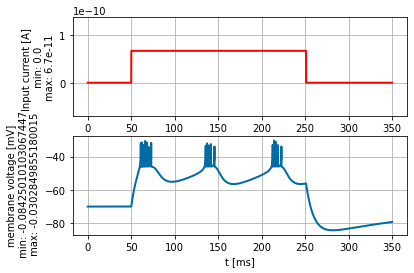

In [15]:
#Irregular

I_AdEx = input_factory.get_step_current(t_start=50, t_end=250, unit_time=b2.ms, amplitude=67 * b2.pamp)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I_AdEx, simulation_time=350 * b2.ms, a=-0.5 * b2.nS, b=7 * b2.pamp, tau_m=9 * b2.ms, tau_w=100 * b2.ms, v_reset=-46 * b2.mV)

plot_tools.plot_voltage_and_current_traces(state_monitor, I_AdEx)
print(f"Number of spikes: {spike_monitor.count[0]}")

Number of spikes: 5


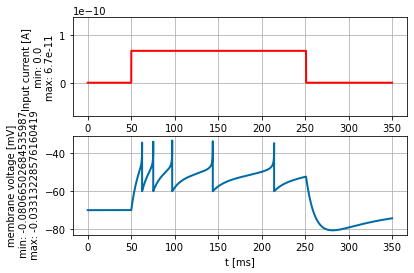

In [16]:
#Transient

I_AdEx = input_factory.get_step_current(t_start=50, t_end=250, unit_time=b2.ms, amplitude=67 * b2.pamp)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I_AdEx, simulation_time=350 * b2.ms, a=1. * b2.nS, b=10 * b2.pamp, tau_m=10 * b2.ms, tau_w=100 * b2.ms, v_reset=-60 * b2.mV)

plot_tools.plot_voltage_and_current_traces(state_monitor, I_AdEx)
print(f"Number of spikes: {spike_monitor.count[0]}")

Number of spikes: 1


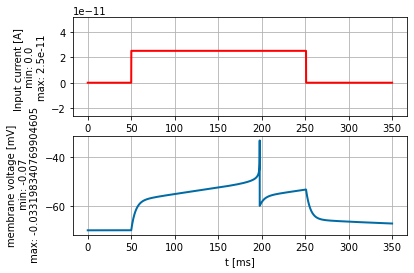

In [17]:
#Delayed


I_AdEx = input_factory.get_step_current(t_start=50, t_end=250, unit_time=b2.ms, amplitude=25 * b2.pamp) # change in amplitude!
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I_AdEx, simulation_time=350 * b2.ms, a=-1. * b2.nS, b=10 * b2.pamp, tau_m=5. * b2.ms, tau_w=100 * b2.ms, v_reset=-60 * b2.mV)

plot_tools.plot_voltage_and_current_traces(state_monitor, I_AdEx)
print(f"Number of spikes: {spike_monitor.count[0]}")

## 4 Phase plane and Nullclines

### Import <a id="P4_import"/>

In [18]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

### A4.1 Run AdEx <a id="A4.1"/>
* [Go back to Q4.1](#Q4.1)

In [19]:
####################
##   Q4.1a solution  ##
####################


def draw_nullclines(u_range, w_range, a, b, Tau_m, Tau_w, v_rheo, delta_T, v_rest, v_r, R, I_t, name_plt):
    
    # grid of u, w values
    u_vals, w_vals = np.meshgrid(u_range, w_range) 

    # calculating time derivatives
    du_dt = 1 / Tau_m * (-(u_vals - v_rest) + delta_T * np.exp((u_vals - v_rheo) / delta_T) - R*w_vals + R*I_t)
    dw_dt = 1 / Tau_w * (a*(u_vals - v_rest) - w_vals + b*Tau_w)
    
    # creating arrows
    plt.quiver(u_vals, w_vals, du_dt, dw_dt*(1e9)) #scaling dw/dt given the difference in orders of magnitude between u and w
    
    # nullclines
    u_nullclines = 1/R * (-(u_range-v_rest) + delta_T * np.exp((u_range-v_rheo) / delta_T) + R*I_t)
    w_nullclines = a * (u_range-v_rest)
    
    
    # plotting
    plt.tight_layout()
    plt.plot(u_range, u_nullclines, label='u-nullcline')
    plt.plot(u_range, w_nullclines, label ='w-nullcline')
    plt.xlim([-0.075,-0.04])
    plt.ylim([-10e-12, 70e-12])
    plt.xlabel('u(V)')
    plt.ylabel('w(A)')
    plt.title(name_plt)
    plt.legend()
    plt.show()
    
    

values of a to draw: [-1e-09, 0.0, 1e-09]


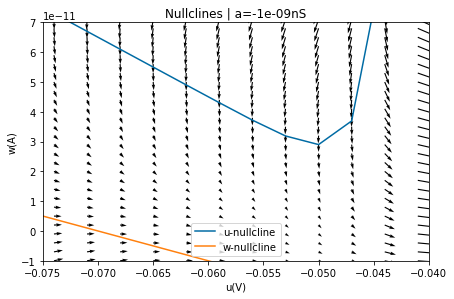

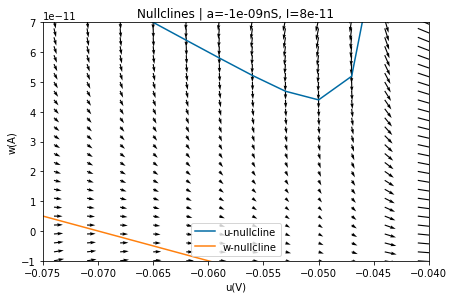

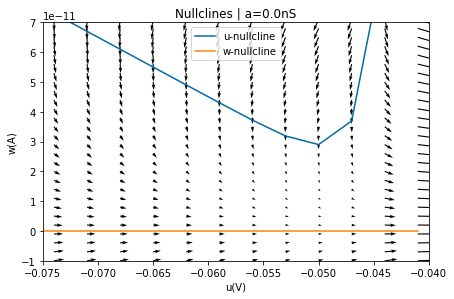

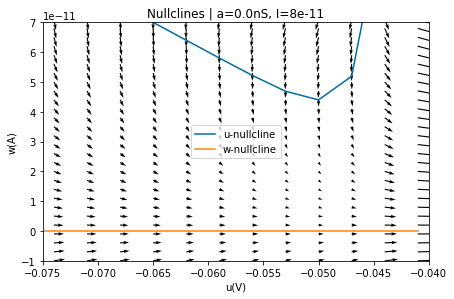

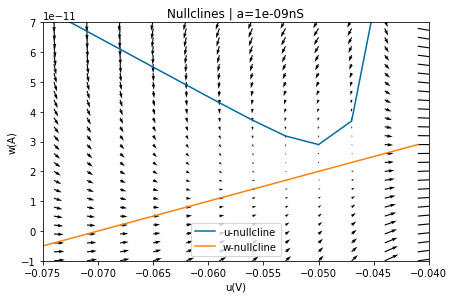

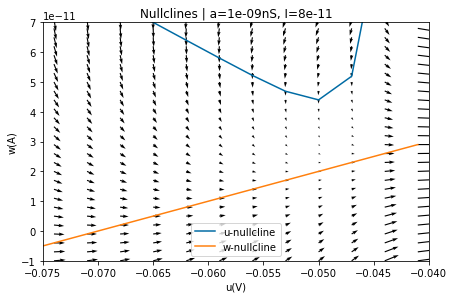

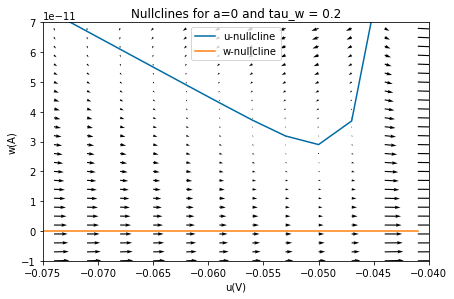

In [20]:
##################################
##   Q4.1b solution nullclines  ##
##################################

u_range= np.arange(-80, -40, 3) / 1000
w_range= np.arange(-10, 80, 3) * (1e-12)
b = 1e-12
tau_m = 0.02
tau_w = 0.03
v_rheo = -0.05
delta_T = 0.002
v_rest = -0.07
v_r = -0.055
R = 500e6
I_t = 65e-12
I_c = 80e-12
# nullclines for changing "a" values:
a_arr = [x*10**-9 for x in range(-1, 2)]
print(f"values of a to draw: {a_arr}")

for a in a_arr:
    draw_nullclines(u_range, w_range, a, b, tau_m, tau_w, v_rheo, delta_T, v_rest, v_r, R, I_t, f'Nullclines | a={a}nS')
    draw_nullclines(u_range, w_range, a, b, tau_m, tau_w, v_rheo, delta_T, v_rest, v_r, R, I_c, f'Nullclines | a={a}nS, I={I_c}')
    
draw_nullclines(u_range, w_range, 0, b,tau_m, 0.2, v_rheo, delta_T, v_rest,v_r,R,I_t, 'Nullclines for a=0 and tau_w = 0.2')

<div class="alert alert-success">
<span style="color:black">

**4.1 Answer:** 
    
\begin{tcolorbox}[colback=green!5]
    
1. The slope for the nullclines of w changes directly proportionally to a. <br>
2. Adding a constant current displaces the nullcline of u to the positive direction of the w-axis. <br>
3. Parameter b can be interpreted as the increase in w that is performed after the voltage (u) is reset. <br>
4. With bigger values of tau_w, the arrows above the nullcline for u on the phase-plane will be more oriented towards the negative direction of the u-axis, meaning that the path that is will be followed to reach the threshold potential will present a turn if it starts above the nullcline for u, meaning that it will take longer to reach the threshold potential again.
    
    
\end{tcolorbox}
    
</span>

### A4.2 Predict firing pattern <a id="A4.2">
* [Go back to Q4.2](#Q4.2)

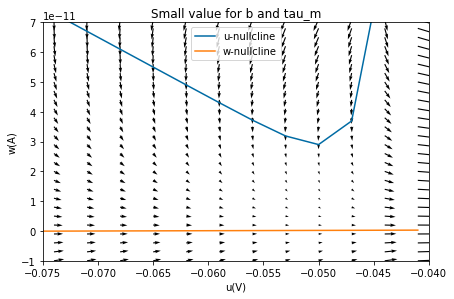

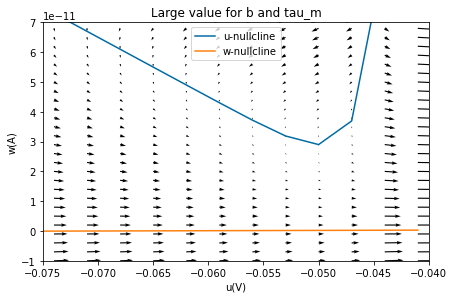

In [24]:
#################################
##   Q4.2 solution nullclines  ##
#################################

a = 0.01e-9      
draw_nullclines(u_range, w_range, a, b, tau_m, tau_w, v_rheo, delta_T, v_rest, v_r, R, 65e-12, 'Small value for b and tau_m')
draw_nullclines(u_range, w_range, a, b*10, tau_m, 5*tau_w, v_rheo, delta_T, v_rest, v_r, R, 65e-12, 'Large value for b and tau_m')


<div class="alert alert-success">
<span style="color:black">

**4.2 Answer:** 

\begin{tcolorbox}[colback=green!5]
    
For a larger b, the leap to the new value for w after a spike is presented will be larger. This means that the neuron will require less time to adapt and this is represented as getting above the nullcline for u faster.
    
\end{tcolorbox}
    
</span>